## Load Data

In [137]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [138]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [152]:
reviews = pd.read_csv('./20171018-02 Amazon_reviews.csv')

In [153]:
# # of rows/ columns
reviews.shape

(21749, 9)

In [154]:
reviews.head()

,ASIN,category,company,num_review,product_desc,rating,review_body,review_date,review_rating
0,B07316QXDB,Streaming Media Players,ESHOWEE,33,ESHOWEE Android 6.0 R1 TV Box RK3229 1 GB Ram ...,4.0,These boxes work really good I've purchased se...,09/26/17,5.0
1,B07316QXDB,Streaming Media Players,ESHOWEE,33,ESHOWEE Android 6.0 R1 TV Box RK3229 1 GB Ram ...,4.0,WORKS FINE SO FAR,10/09/17,4.0
2,B07316QXDB,Streaming Media Players,ESHOWEE,33,ESHOWEE Android 6.0 R1 TV Box RK3229 1 GB Ram ...,4.0,Can't get it to work right and no help button ...,10/01/17,1.0
3,B07316QXDB,Streaming Media Players,ESHOWEE,33,ESHOWEE Android 6.0 R1 TV Box RK3229 1 GB Ram ...,4.0,works great,10/08/17,5.0
4,B07316QXDB,Streaming Media Players,ESHOWEE,33,ESHOWEE Android 6.0 R1 TV Box RK3229 1 GB Ram ...,4.0,Good product,10/03/17,4.0


In [155]:
# Convert date
reviews['review_date'] = pd.to_datetime(reviews['review_date'])

In [156]:
reviews['num_review'] = (reviews['num_review'].str.replace(',','')).astype(int)

In [157]:
# Describe column types
reviews.dtypes

ASIN                     object
category                 object
company                  object
num_review                int64
product_desc             object
rating                  float64
review_body              object
review_date      datetime64[ns]
review_rating           float64
dtype: object

## Visualization

### numbers by category

In [158]:
# Describe numeric columns
reviews.describe()

,num_review,rating,review_rating
count,21749.000000,21749.000000,21749.000000
mean,902.724953,3.953294,4.061658
std,6374.445560,0.482240,1.428228
min,1.000000,1.000000,1.000000
25%,77.000000,3.700000,4.000000
50%,228.000000,3.900000,5.000000
75%,544.000000,4.300000,5.000000
max,111918.000000,5.000000,5.000000


In [159]:
# Which categories were parsed
reviews['category'].value_counts()

Network Adapters            16150
Streaming Media Players      3114
Routers                      1869
Network Transceivers          395
Modems                        100
Repeaters                      80
Network Attached Storage       17
Network Antennas               10
Wireless Access Points         10
Print Servers                   4
Name: category, dtype: int64

In [164]:
# Which companies were parsed
len(reviews['company'].unique()) # number of companies
reviews['company'].value_counts().head(10) # top companies by reviews parsed

#Conclusion:  Amazon resellers listed e.g. Amaz247

292

NETGEAR      1268
Linksys      1112
Roku          906
Amaz247       560
TRENDnet      466
D-Link        441
Cisco         401
Netis         338
TP-Link       330
Actiontec     321
Name: company, dtype: int64

### Ratings

(array([  2748.,      0.,      0.,      0.,      0.,      0.,      0.,
          1209.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   1437.,      0.,      0.,      0.,      0.,      0.,
             0.,   2915.,      0.,      0.,      0.,      0.,      0.,
             0.,  13440.]),
 array([ 1.        ,  1.13333333,  1.26666667,  1.4       ,  1.53333333,
         1.66666667,  1.8       ,  1.93333333,  2.06666667,  2.2       ,
         2.33333333,  2.46666667,  2.6       ,  2.73333333,  2.86666667,
         3.        ,  3.13333333,  3.26666667,  3.4       ,  3.53333333,
         3.66666667,  3.8       ,  3.93333333,  4.06666667,  4.2       ,
         4.33333333,  4.46666667,  4.6       ,  4.73333333,  4.86666667,  5.        ]),
 <a list of 30 Patch objects>)

Text(0.5,0,'Review rating')

Text(0,0.5,'Count of Reviews')

Text(0.5,1,'Distribution of Reviews Ratings')

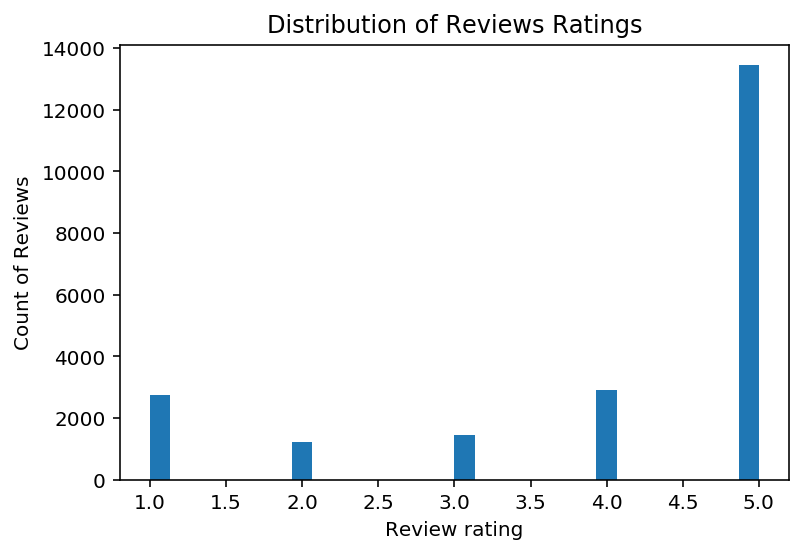

In [180]:
# Distribution of ratings
plt.hist(reviews.review_rating, bins=30)
plt.xlabel("Review rating")
plt.ylabel("Count of Reviews")
plt.title("Distribution of Reviews Ratings", fontsize=12)

# Off-topic conclusion: having only 1 to 5 ratings allows retailers to 
# easily manipulate overall ratings to have all products rate welll

In [199]:
reviews.head()

,ASIN,category,company,num_review,product_desc,rating,review_body,review_date,review_rating,length_review
0,B07316QXDB,Streaming Media Players,ESHOWEE,33,ESHOWEE Android 6.0 R1 TV Box RK3229 1 GB Ram ...,4.0,These boxes work really good I've purchased se...,2017-09-26,5.0,74
1,B07316QXDB,Streaming Media Players,ESHOWEE,33,ESHOWEE Android 6.0 R1 TV Box RK3229 1 GB Ram ...,4.0,WORKS FINE SO FAR,2017-10-09,4.0,17
2,B07316QXDB,Streaming Media Players,ESHOWEE,33,ESHOWEE Android 6.0 R1 TV Box RK3229 1 GB Ram ...,4.0,Can't get it to work right and no help button ...,2017-10-01,1.0,59
3,B07316QXDB,Streaming Media Players,ESHOWEE,33,ESHOWEE Android 6.0 R1 TV Box RK3229 1 GB Ram ...,4.0,works great,2017-10-08,5.0,11
4,B07316QXDB,Streaming Media Players,ESHOWEE,33,ESHOWEE Android 6.0 R1 TV Box RK3229 1 GB Ram ...,4.0,Good product,2017-10-03,4.0,12


#### Length of the review ~ review rating

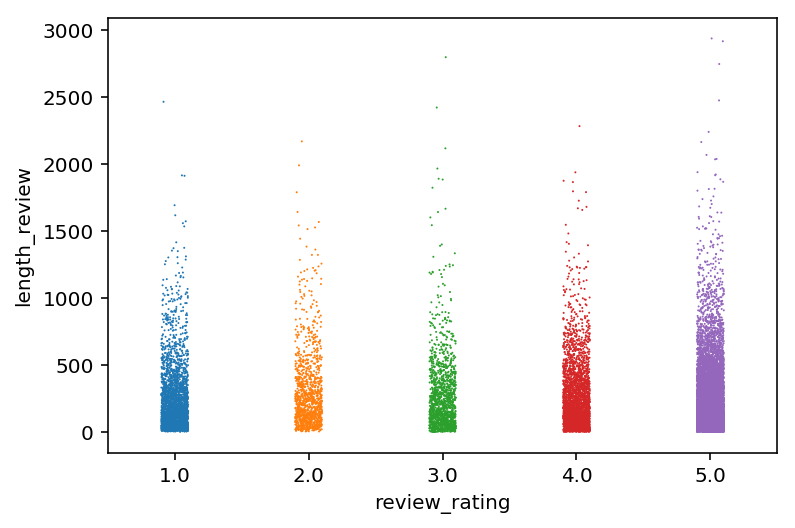

In [212]:
# Stripplot -Draw a scatterplot where one variable is categorical.

sns.stripplot(x=length_reviews.review_rating, y=length_reviews.length_review, jitter=True, size=1)

# Conclusion: as expected some correlation between satisfaction and prolixity

#### Ratings by company

In [264]:
# records for companies with more than x reviews
top_companies = reviews.groupby('company').filter(lambda x: len(x) > 300)
top_companies

,ASIN,category,company,num_review,product_desc,rating,review_body,review_date,review_rating,length_review
20,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,"Perfect replacement , pup chewed the other ...",2015-11-17,5.0,46
21,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,My dog chewed through the original Roku remote...,2017-07-13,4.0,616
22,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,My Roku 3 remote stopped syncing after 3 years...,2016-06-22,5.0,339
23,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,I have had the Roku 3 for about a month and th...,2017-06-07,5.0,946
24,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,"Feels solid, good price- but works ""ok""....I h...",2017-10-06,3.0,565
25,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,If Roku could figure out how to produce a remo...,2017-06-14,5.0,654
26,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,I bought this after I purchased a refurbished ...,2017-04-20,5.0,311
27,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,I brought my Roku 2 unit to our house in Maine...,2017-06-27,5.0,674
28,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,This controller is similar in shape to the ori...,2016-03-27,4.0,475
29,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,I have misplaced the remote that came with the...,2016-08-11,4.0,212


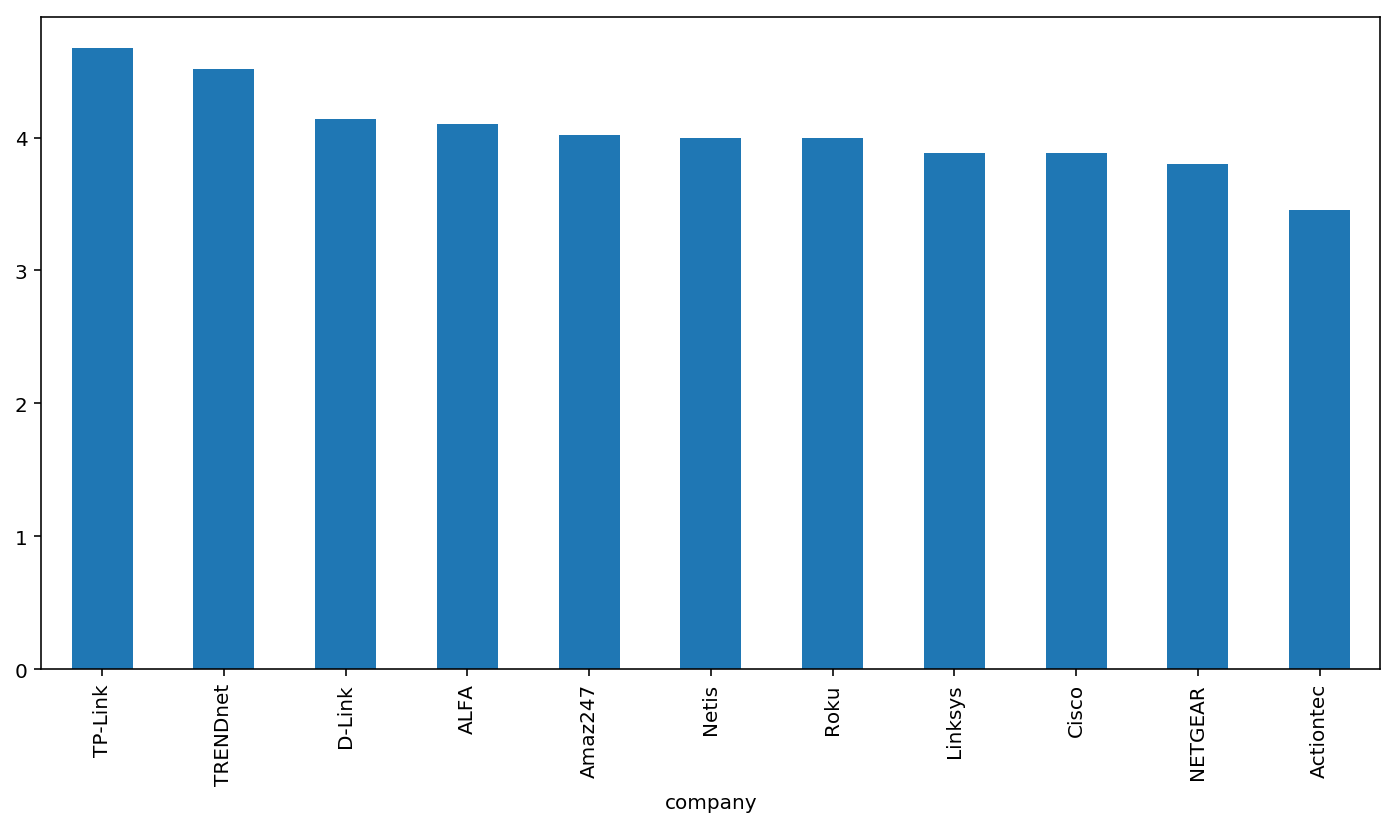

In [214]:
plt.figure(figsize=(12,6))
top_companies.groupby('company')['review_rating'].mean().sort_values(ascending=False).plot.bar()

# TO DO add y > 3

In [246]:
top_companies_ratings = top_companies.groupby('company')['review_rating'].mean().sort_values(ascending=False)
top_companies_ratings = pd.DataFrame(top_companies_ratings).reset_index()
top_companies_ratings


,company,review_rating
0,TP-Link,4.672727
1,TRENDnet,4.517167
2,D-Link,4.140590
3,ALFA,4.100977
4,Amaz247,4.019643
5,Netis,4.000000
6,Roku,3.994481
7,Linksys,3.885791
8,Cisco,3.880299
9,NETGEAR,3.800473


[Text(0,0.5,'Company'), (3.25, 5), Text(0.5,0,'rating')]

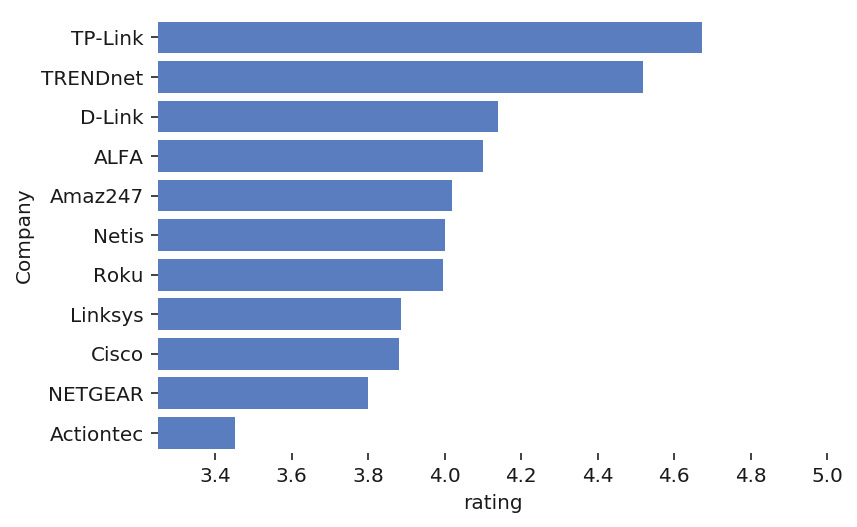

In [250]:
# Horizontal bar chart
f, ax = plt.subplots(figsize=(6, 4))

sns.set_color_codes("muted")
sns.barplot(x="review_rating", y="company", data=top_companies_ratings, color="b")

ax.set(xlim=(3.25, 5), ylabel="Company", xlabel="rating")
sns.despine(left=True, bottom=True)

#for patch in ax.patches :
        # we change the bar width
 #       patch.set_height(0.1)

In [255]:
top_companies.head()

,ASIN,category,company,num_review,product_desc,rating,review_body,review_date,review_rating
20,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,"Perfect replacement , pup chewed the other ...",2015-11-17,5.0
21,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,My dog chewed through the original Roku remote...,2017-07-13,4.0
22,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,My Roku 3 remote stopped syncing after 3 years...,2016-06-22,5.0
23,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,I have had the Roku 3 for about a month and th...,2017-06-07,5.0
24,B01M3Y66CY,Streaming Media Players,Amaz247,2529,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,"Feels solid, good price- but works ""ok""....I h...",2017-10-06,3.0



#### Product ratings by company (boxplot)

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Test')

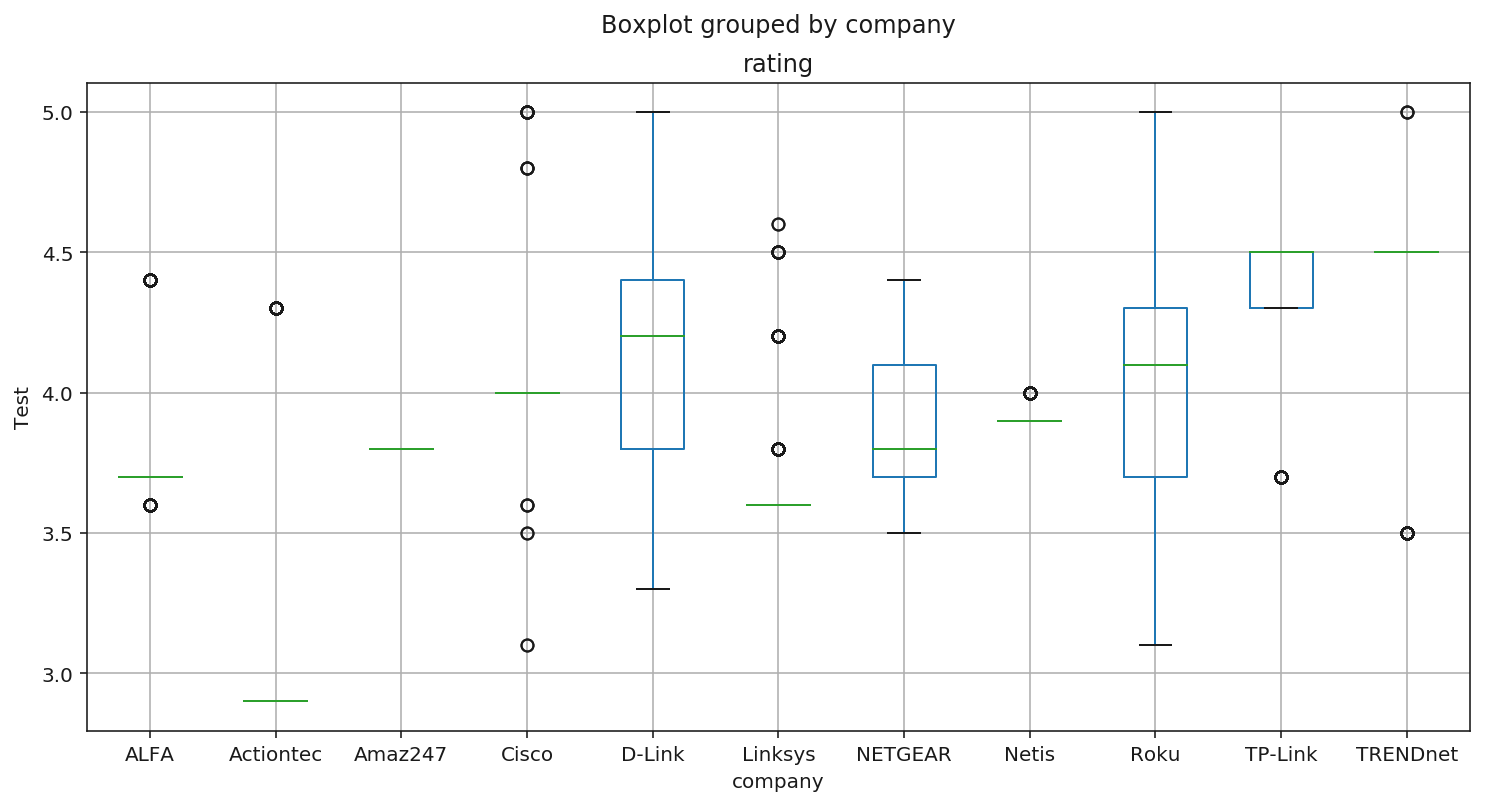

In [254]:
top_companies.boxplot(by='company', column='rating', figsize=(12,6)) # using rating so each data point is a product
plt.ylabel('Test')

#### Zoom on Modems

Text(0.5,0,'Company')

Text(0,0.5,'Median rating')

Text(0.5,1,'Modem Companies Ratings')

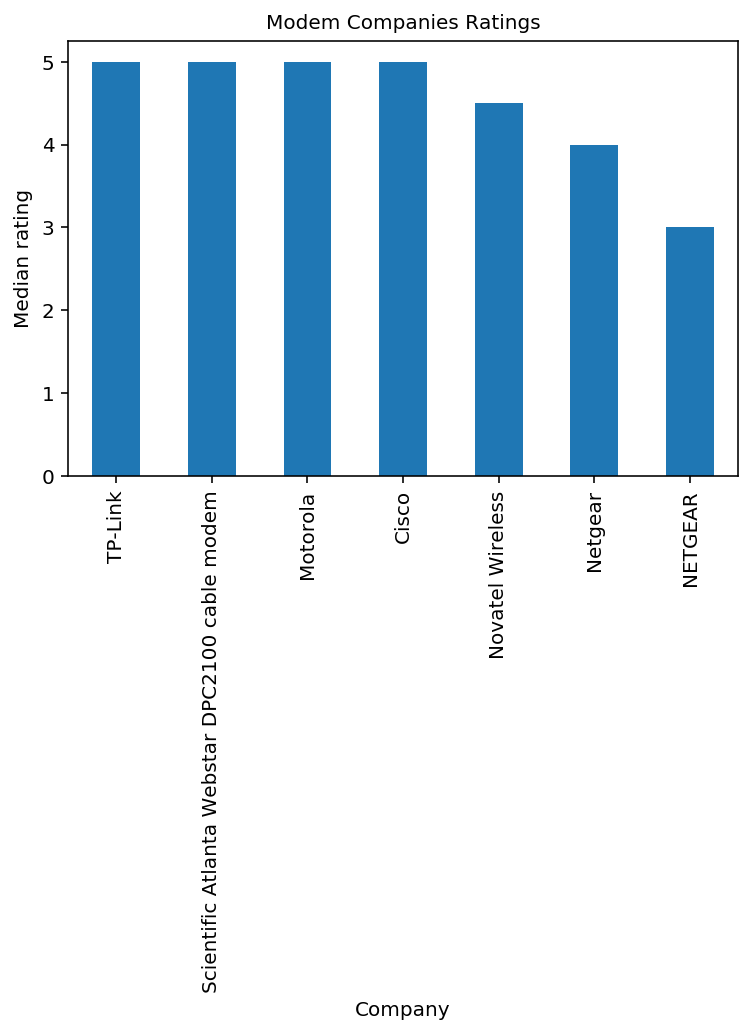

In [149]:
top_companies[top_companies.category=='Modems'].groupby('company')['review_rating'].median().sort_values(ascending=False).plot.bar()
plt.xlabel('Company')
plt.ylabel('Median rating')
plt.title('Modem Companies Ratings', fontsize=10)
# TO DO - horizon bars so company name can be read



### Products

In [217]:
# Products with the most scraped reviews
reviews.groupby(['company', 'ASIN']).review_body.count().sort_values(ascending=False).head(20)

# Different way
#reviews.groupby(['company', 'ASIN']).size().sort_values(ascending=False).head()

company            ASIN      
Linksys            B004T9RR4A    930
Amaz247            B01M3Y66CY    560
NETGEAR            B00741F05I    440
TRENDnet           B01N4FYWUN    410
Cisco              B006CQR7CK    380
HISY               B00IAHRIUA    283
NETGEAR            B006OOKT3Y    282
Actiontec          B00CB2F65O    275
Millennia          B00JAPZRH2    230
ALFA               B003ILWRLI    230
GHS2               B00GIX8CUS    230
Amped Wireless     B004MDQQ04    230
Satechi            B008BC1U4O    230
Sling Media        B009FU8BTI    230
KUSDGONN-BEY       B01N8X0COI    230
CCM                B00MEWT3AU    220
Edimax             B00LGN8HWS    212
Vantec             B00GRNUKT0    210
soundbot           B015S22N54    210
Ubiquiti Networks  B00CPRVF5K    200
Name: review_body, dtype: int64

In [281]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import HoverTool, NumeralTickFormatter

In [282]:
output_notebook()

Loading BokehJS ...

In [288]:
# create a df without all the reviews
products = reviews[['category', 'company', 'ASIN', 'product_desc', 'num_review', 'rating']].drop_duplicates()
products.head()
products.shape

,category,company,ASIN,product_desc,num_review,rating
0,Streaming Media Players,ESHOWEE,B07316QXDB,ESHOWEE Android 6.0 R1 TV Box RK3229 1 GB Ram ...,33,4.0
10,Streaming Media Players,NaN,B00ZV9RDKK,Fire TV Stick with Alexa Voice Remote | Stream...,111918,4.5
20,Streaming Media Players,Amaz247,B01M3Y66CY,Amaz247 ARC101 Standard IR Replacement Remote ...,2529,3.8
30,Streaming Media Players,TiVo,B01DR4T73Q,TiVo Roamio OTA 1 TB DVR - With No Monthly Ser...,1139,4.2
40,Streaming Media Players,Roku,B06XS2XKHM,Roku Premiere 4620XB 4K UHD Streaming Media Pl...,218,4.1


(496, 6)

In [294]:
from math import pi

# create a new plot using figure
p = figure(plot_width=400, plot_height=400)

p.circle('num_review', 'rating', source=products)
# Rotate the x-axis by pi/4
p.xaxis.major_label_orientation = pi/4

# Add numeral tick formatter, find more details here:
p.xaxis.formatter = NumeralTickFormatter(format="(0.00 a)")
p.yaxis.formatter = NumeralTickFormatter(format="(0.00 a)")

# Add a hovertool
hover = HoverTool(tooltips=[
    ("ASIN", "@ASIN"),
    ("product_desc", "@product_desc"),
    ("Reviews", "@num_review"),
    ("Rating", "@rating{(0.0 a)}")])
p.add_tools(hover)
p.xaxis.axis_label = "Number of Reviews"
p.yaxis.axis_label = "Amazon Product Rating"

show(p)

GlyphRenderer(id='d9536eb6-405e-4152-8194-13d193fbd3b2', ...)

#### Graph without outliers

In [306]:
products_numeric_col = products[['num_review', 'rating']]
no_outlier_mask = products_numeric_col.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)
products_no_outliers = products.loc[no_outlier_mask,:] 
products_no_outliers.head() # no more fire TV Stick and its 110k reviews

,category,company,ASIN,product_desc,num_review,rating
0,Streaming Media Players,ESHOWEE,B07316QXDB,ESHOWEE Android 6.0 R1 TV Box RK3229 1 GB Ram ...,33,4.0
20,Streaming Media Players,Amaz247,B01M3Y66CY,Amaz247 ARC101 Standard IR Replacement Remote ...,2529,3.8
30,Streaming Media Players,TiVo,B01DR4T73Q,TiVo Roamio OTA 1 TB DVR - With No Monthly Ser...,1139,4.2
40,Streaming Media Players,Roku,B06XS2XKHM,Roku Premiere 4620XB 4K UHD Streaming Media Pl...,218,4.1
50,Streaming Media Players,Nyrius,B009E6R89C,Nyrius ARIES Prime Wireless Video HDMI Transmi...,1666,3.8


In [313]:
# create a new plot using figure
p = figure(plot_width=400, plot_height=400)

p.circle('num_review', 'rating', source=products_no_outliers)
# Rotate the x-axis by pi/4
p.xaxis.major_label_orientation = pi/4

# Add numeral tick formatter, find more details here:
p.xaxis.formatter = NumeralTickFormatter(format="(0.00 a)")
p.yaxis.formatter = NumeralTickFormatter(format="(0.00 a)")

# Add a hovertool
hover = HoverTool(tooltips=[
    ("ASIN", "@ASIN"),
    ("product_desc", "@product_desc"),
    ("Reviews", "@num_review{,}"),
    ("Rating", "@rating{(0.0 a)}")])
p.add_tools(hover)
p.xaxis.axis_label = "Number of Reviews"
p.yaxis.axis_label = "Amazon Product Rating"

show(p)

GlyphRenderer(id='92f6a5ba-f514-44d1-b9be-1144f7e2a84e', ...)

## Duplicates

In [218]:
# Check number of unique elements 
# Reviews should be unique
reviews.apply(lambda x: len(x.unique()), axis=0) 

ASIN               496
category            10
company            292
num_review         190
product_desc       496
rating              33
review_body      20959
review_date       2501
review_rating        5
length_review     1254
dtype: int64

In [219]:
# Show duplicate reviews
#reviews[reviews.duplicated('review_body')] # WRONG - some truncated reviews come up for different products
reviews[reviews.duplicated()]

# Conclusion: actual duplicate on the website!

,ASIN,category,company,num_review,product_desc,rating,review_body,review_date,review_rating,length_review
730,B00K6MZEHQ,Network Transceivers,Hummingbird Networks,10,HP J4858C Compatible 1000Base-SX SFP LC for Pr...,5.0,Hummingbird GBIC performing excellent on my HP...,2015-12-08,5.0,143
5816,B072KM13Y8,Network Adapters,TRS,61,USB Type C to RJ45 Adapter - USB C 3.1 to Giga...,4.5,It can be placed in my brief case taking up li...,2017-07-06,5.0,275
11372,B00YOG16RM,Network Adapters,7inova,38,7inova 7WL100 150Mbps 802.11n Wireless N USB A...,4.1,Full disclosure: ​I received a free product in...,2015-07-09,5.0,165


In [40]:
# Remove duplicates (keep first occurence)
reviews.drop_duplicates(subset=None, keep='first', inplace=True)
reviews.shape

(1555, 8)

In [103]:
# Short reviews
mask = reviews['review_body'].str.len() < 10
reviews[mask]

,ASIN,category,company,num_review,product_desc,rating,review_body,review_date,review_rating
44,B01MYV94H3,Streaming Media Players,NaN,189,NVIDIA SHIELD TV Pro Home Media Server,4.2,good,2017-10-16,5.0
48,B01MYV94H3,Streaming Media Players,NaN,189,NVIDIA SHIELD TV Pro Home Media Server,4.2,Love it,2017-03-22,5.0
124,B01LXUZPQU,Streaming Media Players,Roku,1460,Roku Premiere+ - HD and 4K UHD Streaming Media...,4.1,Pros,2017-04-05,4.0
139,B01N1NT9Y6,Streaming Media Players,NaN,850,NVIDIA SHIELD TV Streaming Media Player [2017 ...,4.3,Top notch,2017-03-25,5.0
171,B01N9O3UTF,Streaming Media Players,Fire Cable,508,FireCable Plus Powers ANY HDMI Streaming Devic...,3.6,like it,2017-09-08,5.0
220,B06XS5T8NN,Streaming Media Players,Roku,315,"Roku Express | HD Streaming Media Player, incl...",4.3,very nice,2017-06-21,5.0
232,B06XS33WDQ,Streaming Media Players,Roku,193,Roku Premiere+ | 4K UHD Streaming Media Player...,4.1,thanks,2017-09-19,5.0
233,B06XS33WDQ,Streaming Media Players,Roku,193,Roku Premiere+ | 4K UHD Streaming Media Player...,4.1,Good,2017-07-20,4.0
256,B00TIBFEIA,Streaming Media Players,TiVo,930,TiVo Mini TCDA93000 with IR/RF Remote,4.2,Tivo Mini,2017-10-10,5.0
335,B01M3Y66CY,Streaming Media Players,Amaz247,2528,Amaz247 ARC101 Standard IR Replacement Remote ...,3.8,Pros,2016-08-31,4.0
